# EDA for Cab Investment Firm

## by Connor Bryson
## 9/11/2023

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Loading in Data
cab_data = pd.read_csv("./Data/Cab_Data.csv")
city = pd.read_csv("./Data/City.csv")
Customer_ID = pd.read_csv("./Data/Customer_ID.csv")
Transaction_ID = pd.read_csv("./Data/Transaction_ID.csv")

# Transforming Data to Right Format

In [2]:
# Converting Date to Date object
def convert_time(x):
    return (datetime.datetime(1899,12,31) + datetime.timedelta(days = int(x)))

cab_data['Date of Travel'] = cab_data['Date of Travel'] \
.apply(lambda x : convert_time(x) if (np.all(pd.notnull(x))) else x)

# Filtering date for timeperiod as some data falls outside of time period
cab_data = cab_data[(cab_data['Date of Travel']>="2016-01-31") & (cab_data['Date of Travel']<="2018-12-31")]

### Joining The Data Into One Master Dataset

Cab data will be the main data to join on since it has 2 varibales that can be joined on

In [3]:
# Merging cab and transaction data
master_cab_data = pd.merge(cab_data, Transaction_ID, on='Transaction ID', how = 'outer')

# Combining master and customer_id data
master_cab_data = pd.merge(master_cab_data, Customer_ID, on = 'Customer ID', how = 'outer')

# Combining master and city data
master_cab_data = pd.merge(master_cab_data, city, on = 'City', how = 'outer')

# Filtering Data to Desired Date
master_cab_data = master_cab_data[(master_cab_data['Date of Travel']>= "2016-01-31") & (master_cab_data['Date of Travel']<="2018-12-31")]

#### One big thing to note is that we can see that not every cutomer in the Customer_ID table ended up having a transaction which means we can't gain any insight into which Cab company a customer would choose.

In [4]:
master_cab_data = master_cab_data.sort_values(by = 'Date of Travel')
master_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
433764,10005122.0,2016-01-31,Yellow Cab,PITTSBURGH PA,26.88,548.97,325.7856,48763.0,Card,Male,34.0,23267.0,"542,085","3,643"
191326,10006421.0,2016-01-31,Yellow Cab,LOS ANGELES CA,46.41,1115.65,634.8888,6261.0,Cash,Female,20.0,24294.0,"1,595,037","144,132"
7844,10005558.0,2016-01-31,Pink Cab,BOSTON MA,14.14,241.25,142.8140,57150.0,Cash,Female,26.0,9950.0,"248,968","80,021"
191201,10006414.0,2016-01-31,Yellow Cab,LOS ANGELES CA,29.87,784.19,419.3748,8901.0,Card,Male,22.0,4868.0,"1,595,037","144,132"
191085,10006406.0,2016-01-31,Yellow Cab,LOS ANGELES CA,38.11,992.18,489.3324,8334.0,Card,Male,37.0,3607.0,"1,595,037","144,132"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262571,10435753.0,2018-12-31,Yellow Cab,NEW YORK NY,3.27,85.05,45.5184,718.0,Card,Male,53.0,17902.0,"8,405,837","302,149"
414929,10436602.0,2018-12-31,Yellow Cab,WASHINGTON DC,37.20,541.18,508.8960,51380.0,Card,Male,38.0,13277.0,"418,859","127,001"
401093,10436536.0,2018-12-31,Yellow Cab,WASHINGTON DC,11.60,180.69,151.7280,51797.0,Card,Male,45.0,9902.0,"418,859","127,001"
352718,10436001.0,2018-12-31,Yellow Cab,SAN DIEGO CA,43.60,644.01,544.1280,18246.0,Card,Male,39.0,2336.0,"959,307","69,995"


### Age

In [21]:
master_cab_data['Age Group'] = pd.cut(master_cab_data['Age'],  bins=[-1, 10, 19, 29, 39, 49, 59, 69],
                    labels=[ 'Children', 'Adolescents' , '20s', '30s', '40s', '50s', '60s'])
master_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group
433764,10005122.0,2016-01-31,Yellow Cab,PITTSBURGH PA,26.88,548.97,325.7856,48763.0,Card,Male,34.0,23267.0,"542,085","3,643",30s
191326,10006421.0,2016-01-31,Yellow Cab,LOS ANGELES CA,46.41,1115.65,634.8888,6261.0,Cash,Female,20.0,24294.0,"1,595,037","144,132",20s
7844,10005558.0,2016-01-31,Pink Cab,BOSTON MA,14.14,241.25,142.8140,57150.0,Cash,Female,26.0,9950.0,"248,968","80,021",20s
191201,10006414.0,2016-01-31,Yellow Cab,LOS ANGELES CA,29.87,784.19,419.3748,8901.0,Card,Male,22.0,4868.0,"1,595,037","144,132",20s
191085,10006406.0,2016-01-31,Yellow Cab,LOS ANGELES CA,38.11,992.18,489.3324,8334.0,Card,Male,37.0,3607.0,"1,595,037","144,132",30s


In [22]:
master_cab_data.count() / master_cab_data.shape[0]

Transaction ID        1.0
Date of Travel        1.0
Company               1.0
City                  1.0
KM Travelled          1.0
Price Charged         1.0
Cost of Trip          1.0
Customer ID           1.0
Payment_Mode          1.0
Gender                1.0
Age                   1.0
Income (USD/Month)    1.0
Population            1.0
Users                 1.0
dtype: float64

In [23]:
master_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355119 entries, 433764 to 405322
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      355119 non-null  float64       
 1   Date of Travel      355119 non-null  datetime64[ns]
 2   Company             355119 non-null  object        
 3   City                355119 non-null  object        
 4   KM Travelled        355119 non-null  float64       
 5   Price Charged       355119 non-null  float64       
 6   Cost of Trip        355119 non-null  float64       
 7   Customer ID         355119 non-null  float64       
 8   Payment_Mode        355119 non-null  object        
 9   Gender              355119 non-null  object        
 10  Age                 355119 non-null  float64       
 11  Income (USD/Month)  355119 non-null  float64       
 12  Population          355119 non-null  object        
 13  Users               3551

#### Information about Data
1. The data spans from 31/01/2016 to 31/12/2018.
2. The data contains two cab company data combined.

### Cab Data 

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data = cab_data.drop_duplicates()

In [6]:
cab_data.shape

(359392, 7)

In [44]:
cab_data.sort_values(by = 'Date of Travel').head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1030,10001340,2016-01-03,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
489,10000640,2016-01-03,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
484,10000635,2016-01-03,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
850,10001001,2016-01-03,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
160,10000171,2016-01-03,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840


### Transaction_ID 

In [32]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [33]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [50]:
Transaction_ID = Transaction_ID.drop_duplicates()

In [51]:
Transaction_ID.shape

(440098, 3)

### Customer_ID

In [34]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
Customer_ID

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [86]:
Customer_ID = Customer_ID.drop_duplicates()

In [94]:
Customer_ID[["Customer ID"]].value_counts(sort=True)[-1::-1]

Customer ID
60000          1
17515          1
17513          1
17512          1
17511          1
              ..
37514          1
37513          1
37512          1
36960          1
1              1
Length: 49171, dtype: int64

### City

In [44]:
city = city.drop_duplicates()

In [36]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [54]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [55]:
city.shape

(20, 3)

#### Checking for outliers

##### KM Travelled

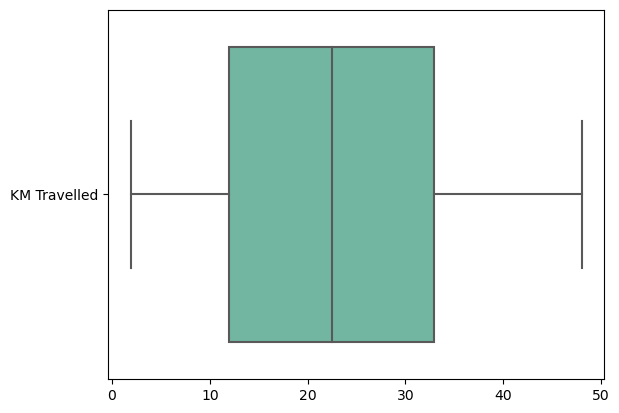

In [389]:
ax = sns.boxplot(data= master_cab_data[["KM Travelled"]] , orient="h", palette="Set2")

No outliers for KM Travelled!

##### Price Charged

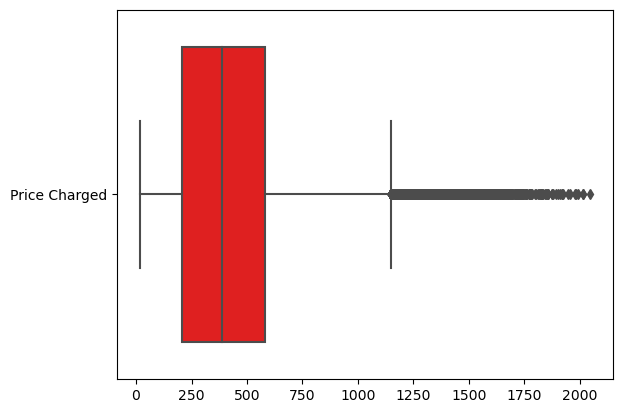

In [390]:
ax = sns.boxplot(data= master_cab_data[["Price Charged"]] , orient="h", color="red")

As seen above, there are a lot of outlier for price charged. For this data analysis I will be keeping them since there isn't a column that shows how long each trip ended up taking. Also since a lot of data are outliers, I would also assume there is more than meets the eye with these outliers. Thus they will be treated as normal. 

##### Cost of Trip

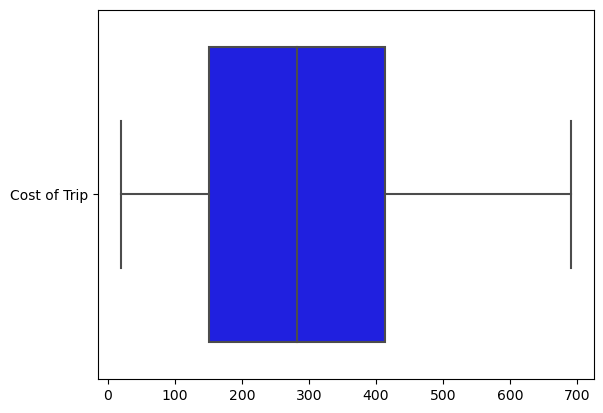

In [392]:
ax = sns.boxplot(data= master_cab_data[["Cost of Trip"]] , orient="h", color="blue")

No outliers for Cost of Trip!

##### Age 

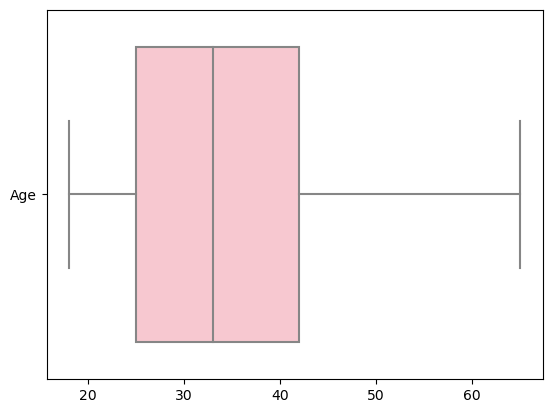

In [393]:
ax = sns.boxplot(data= master_cab_data[["Age"]] , orient="h", color="pink")

No outliers for Age!

##### Income (USD/Month)

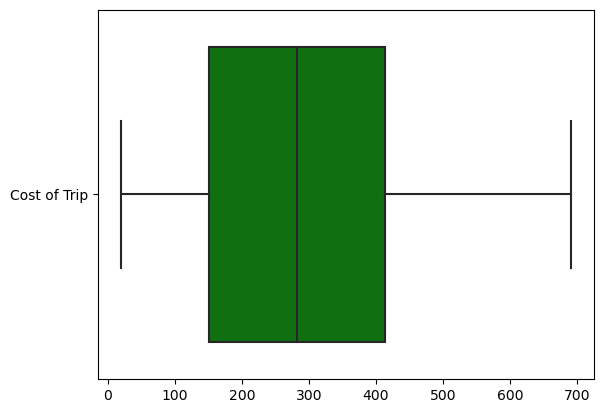

In [402]:
ax = sns.boxplot(data= master_cab_data[["Cost of Trip"]] , orient="h", color="Green")

No outliers for Income (USD/Month)!

### Assumptions for the Analysis

1. For the city data set, the column "Users" will be treated as the number of Cab users within that city. 
2. The "Date of Travel" Column is in days from 1900 (1899, 12, 31 since 1900 was a leap year) which is the excel default original timestamp. 
3. After filtering the master data set to the specified dates of the data we want to look at there are no other NA value columns. This means that the master data without the NAs give us a clearer picture of who and what we are dealing with.

### Questions For Data (Hypothesis)

1. Which Cab Company is more profitable?
2. Which dates tends to have the most transactions per company and why?
3. Which cities charge the most per trip based on distance travelled?
4. Is there a relationship between season and passengers?
5. Are there certain customers who spend more in general or only based on season? and where?
6. Does using card or cash make a difference in the distance travelled?
7. Do younger audiences tend to take more cab rides than older generations?

#### Breaking down Cab Company Profit

In [423]:
master_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
875,10006291,2016-01-31,Yellow Cab,DALLAS TX,5.82,148.10,78.2208,24779,Cash
1421,10007076,2016-01-31,Yellow Cab,WASHINGTON DC,37.83,855.85,531.1332,53082,Card
401,10005673,2016-01-31,Pink Cab,NEW YORK NY,31.68,622.35,319.9680,518,Card
395,10005667,2016-01-31,Pink Cab,NEW YORK NY,9.52,203.79,99.0080,2914,Cash
394,10005666,2016-01-31,Pink Cab,NEW YORK NY,38.94,737.68,401.0820,66,Card


In [23]:
pink_cab = master_cab_data[master_cab_data["Company"] == "Pink Cab"]
yellow_cab = master_cab_data[master_cab_data["Company"] == "Yellow Cab"]
pink_cab.shape, yellow_cab.shape

((83824, 15), (271295, 15))

First thing to note off the bat, is that yellow cab has way more observations than pink cab company. This means either there was more data collected for yellow cab in general or there was a lot of pink cab data that had missing values.

Let's look at the total profit for each company:

In [28]:
master_cab_data.groupby('Company')[["KM Travelled", "Price Charged", "Cost of Trip"]].agg(['sum', 'mean']).round(2)

KM Travelled        Price Charged         Cost of Trip        
                    sum   mean           sum    mean          sum    mean
Company                                                                  
Pink Cab     1890944.90  22.56  2.603852e+07  310.63  20799282.80  248.13
Yellow Cab   6122880.43  22.57  1.241268e+08  457.53  80824199.52  297.92

Profit in this case is going to be the sum of Price Charged minus the sum of Cost of the Trip

In [6]:
#Profit Function
def profit(dataset):
    profit = dataset["Price Charged"].sum() - dataset["Cost of Trip"].sum()
    return profit

##### Pink Cab

In [95]:
# Pink Cab Profit
pink_cab_profit = profit(pink_cab)
pink_cab_profit.round(2)

5239236.9

Thus in the 2 year time frame, Pink Cab made a total profit of $5,239,236.90 for the 83,824 observations available/

##### Yellow Cab

In [29]:
# Yellow Cab Profit
yellow_cab_profit = profit(yellow_cab)
yellow_cab_profit.round(2)

43302611.66

Thus in the 2 year time frame, Yellow Cab made a total profit of $43,302,611.66 for the 271295 observations available.

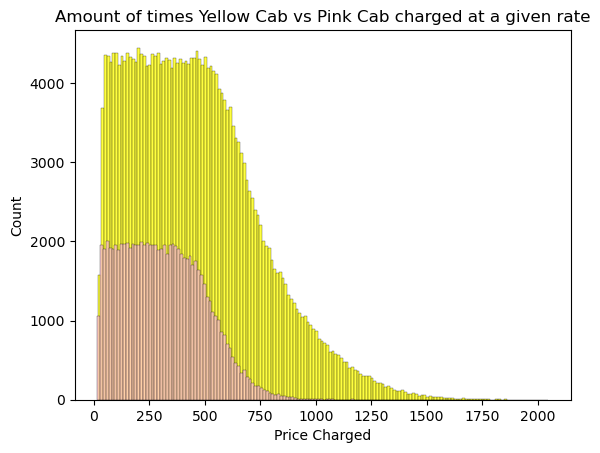

In [31]:
b = sns.histplot(yellow_cab, x = "Price Charged", color = "Yellow") 
b.set_title("Amount of times Yellow Cab vs Pink Cab charged at a given rate")
a = sns.histplot(pink_cab, x = "Price Charged", color = "Pink")

We can see from the above graph that not only does yellow have more volume of transactions, but also they charge higher rates to people. 

Let's break this down by year to see how much increase in profit there was between the 2 years

#### Breaking Profit Down by Year

In [7]:
# Group By Year and Company
data_per_year = master_cab_data.groupby(["Company", master_cab_data["Date of Travel"].dt.year], group_keys = False) \
["KM Travelled", "Price Charged", "Cost of Trip"].sum().round(2)

# Add Profit Column to Table
data_per_year["Profit"] = profit(data_per_year.groupby(["Company", "Date of Travel"]))

# Add Profit Per Month
data_per_year["Profit Per Month"] = data_per_year.groupby(["Company", "Date of Travel"], group_keys = False)\
["Profit"].apply(lambda x: x/12).round(2) 

# Add Profit Per Day
data_per_year["Profit Per Day"] = data_per_year.groupby(["Company", "Date of Travel"], group_keys = False)\
["Profit"].apply(lambda x: x/365).round(2) 

C:\Users\cdbry\AppData\Local\Temp\ipykernel_7592\921929827.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_per_year = master_cab_data.groupby(["Company", master_cab_data["Date of Travel"].dt.year], group_keys = False) \


In [10]:
# Add Amount Charged Per KM
data_per_year["Charge Per KM"] = (data_per_year["Price Charged"] / data_per_year["KM Travelled"]).round(2)

# Add Profit Per KM
data_per_year["Profit Per KM"] = (data_per_year["Profit"] / data_per_year["KM Travelled"]).round(2)

In [9]:
data_per_year

KM Travelled  Price Charged  Cost of Trip  \
Company    Date of Travel                                              
Pink Cab   2016               540694.55     7573094.36    5943731.79   
           2017               685635.03     9577146.48    7542978.22   
           2018               664615.32     8888278.86    7312572.80   
Yellow Cab 2016              1773413.72    36529301.94   23411909.94   
           2017              2217474.69    45871862.15   29278065.45   
           2018              2131992.02    41725647.09   28134224.12   

                                Profit  Profit Per Month  Profit Per Day  \
Company    Date of Travel                                                  
Pink Cab   2016             1629362.57         135780.21         4464.01   
           2017             2034168.26         169514.02         5573.06   
           2018             1575706.06         131308.84         4317.00   
Yellow Cab 2016            13117392.00        1093116.00        35938.06   
           2017            16593796.70        1382816.39        45462.46   
           2018            13591422.97        1132618.58        37236.78   

                           Charge Per KM  Profit Per KM  
Company    Date of Travel                                
Pink Cab   2016                    14.01           3.01  
           2017                    13.97           2.97  
           2018                    13.37           2.37  
Yellow Cab 2016                    20.60           7.40  
           2017                    20.69           7.48  
           2018                    19.57           6.37

#### By Quarter

In [216]:
# Group By Year and Company
data_per_quarter = master_cab_data.groupby(["Company", master_cab_data["Date of Travel"].dt.quarter], group_keys = False) \
["KM Travelled", "Price Charged", "Cost of Trip"].sum().round(2)

# Add Profit Column to Table
data_per_quarter["Profit"] = profit(data_per_quarter.groupby(["Company", "Date of Travel"]))

C:\Users\cdbry\AppData\Local\Temp\ipykernel_18652\3427096165.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_per_quarter = master_cab_data.groupby(["Company", master_cab_data["Date of Travel"].dt.quarter], group_keys = False) \


In [215]:
data_per_quarter

KM Travelled  Price Charged  Cost of Trip  \
Company    Date of Travel                                              
Pink Cab   1                  272100.11     3890898.46    2992280.92   
           2                  333964.91     4320401.92    3674023.74   
           3                  541788.39     7150825.35    5957938.46   
           4                  743091.49    10676393.97    8175039.69   
Yellow Cab 1                 1074193.22    22983729.63   14180374.95   
           2                 1236594.38    26971472.67   16320199.99   
           3                 1629961.36    31452148.46   21519604.32   
           4                 2182131.47    42719460.42   28804020.26   

                                Profit  
Company    Date of Travel               
Pink Cab   1                 898617.54  
           2                 646378.18  
           3                1192886.89  
           4                2501354.28  
Yellow Cab 1                8803354.68  
           2               10651272.68  
           3                9932544.14  
           4               13915440.16

We can even see on average per year, month, and day Yellow Cab company outperforms Pink Cab Company

### Let's look at the profit by City for each Company

In [109]:
yellow_cab["City"].unique()

array(['PITTSBURGH PA', 'WASHINGTON DC', 'CHICAGO IL', 'ATLANTA GA',
       'BOSTON MA', 'NEW YORK NY', 'SAN DIEGO CA', 'SILICON VALLEY',
       'TUCSON AZ', 'DALLAS TX', 'AUSTIN TX', 'DENVER CO',
       'LOS ANGELES CA', 'SEATTLE WA', 'MIAMI FL', 'SACRAMENTO CA',
       'ORANGE COUNTY', 'NASHVILLE TN', 'PHOENIX AZ'], dtype=object)

Text(0, 0.5, 'Count')

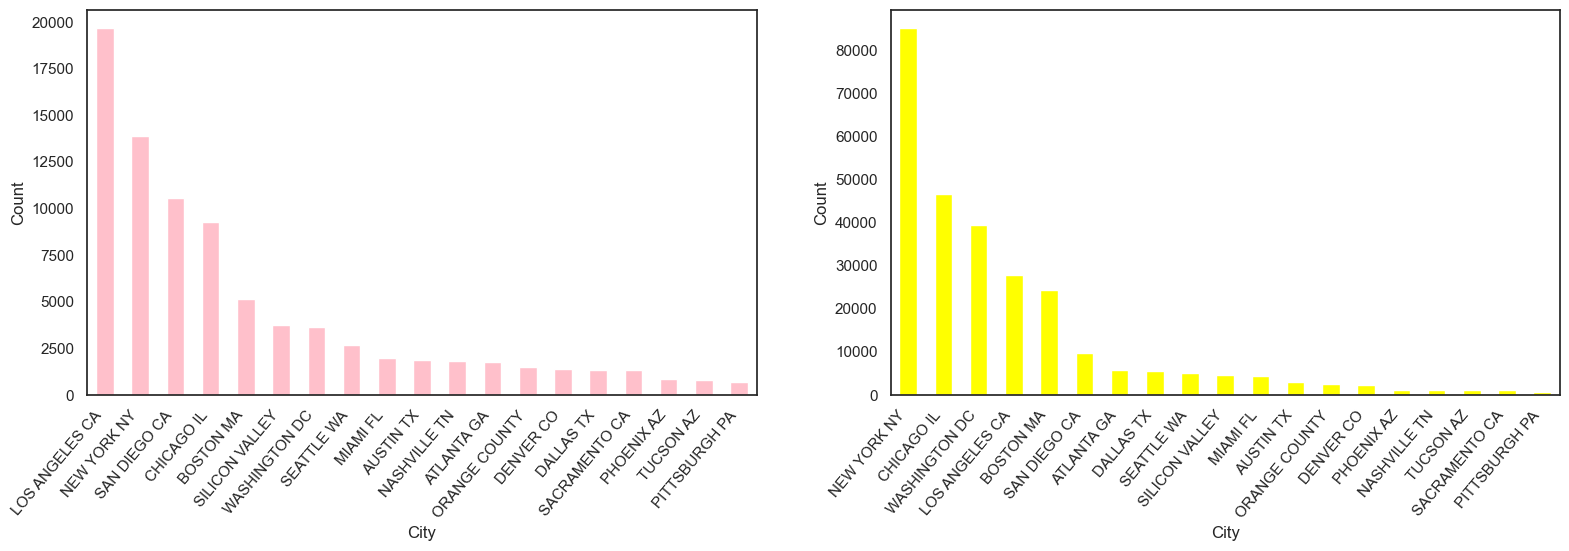

In [276]:
sns.set(rc={"figure.figsize":(19, 5)})
sns.set_theme(style ="white")

fig, axs = plt.subplots(ncols=2)

# Yellow City Plot
yellow_city = yellow_cab.City.value_counts().plot(y='number', kind='bar', color = "Yellow", legend=False, ax=axs[1])
yellow_city.set_xticklabels(yellow_city.get_xticklabels(), rotation=50, horizontalalignment='right')
yellow_city.set_xlabel("City")
yellow_city.set_ylabel("Count")

# Pink City Plot
pink_city = pink_cab.City.value_counts().plot(y='number', kind='bar', color = "Pink", legend=False, ax=axs[0])
pink_city.set_xticklabels(pink_city.get_xticklabels(), rotation=50, horizontalalignment='right')
pink_city.set_xlabel("City")
pink_city.set_ylabel("Count")

In [280]:
# sns.set(rc={"figure.figsize":(19, 5)})
# sns.set_theme(style ="white")
# fig, axs = plt.subplots(ncols=2)


# yellow_city = sns.histplot(yellow_cab, x = "City", color = "Yellow", ax=axs[0])
# yellow_city.set_xticklabels(yellow_city.get_xticklabels(), rotation=50, horizontalalignment='right')

# pink_city = sns.histplot(pink_cab, x = "City", color = "Pink",  ax=axs[1])
# pink_city.set_xticklabels(pink_city.get_xticklabels(), rotation=50, horizontalalignment='right')

In [12]:
# Group By City
per_city = master_cab_data.groupby(["City", "Company"], group_keys = False) \
["KM Travelled", "Price Charged", "Cost of Trip"].sum().round(2)

# Add Amount Charged Per KM
per_city["Charge Per KM"] = (per_city["Price Charged"] / per_city["KM Travelled"]).round(2)

# Add Profit Column to Table
per_city["Profit"] = profit(per_city.groupby(["City", "Company"]))

# Add Profit Per KM
per_city["Profit Per KM"] = (per_city["Profit"] / per_city["KM Travelled"]).round(2)

C:\Users\cdbry\AppData\Local\Temp\ipykernel_14648\3769204749.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  per_city = master_cab_data.groupby(["City", "Company"], group_keys = False) \


In [13]:
per_city

KM Travelled  Price Charged  Cost of Trip  \
City           Company                                                 
ATLANTA GA     Pink Cab        39209.93      525463.64     430727.46   
               Yellow Cab     127274.68     2406772.46    1679652.72   
AUSTIN TX      Pink Cab        40803.28      595306.30     448561.39   
               Yellow Cab      67706.13     1267498.80     893258.52   
BOSTON MA      Pink Cab       116530.44     1540983.77    1281139.87   
               Yellow Cab     545632.90     8676316.95    7204327.13   
CHICAGO IL     Pink Cab       207930.59     2598708.02    2286456.39   
               Yellow Cab    1055027.42    16900943.45   13925153.94   
DALLAS TX      Pink Cab        29969.03      354559.42     329498.85   
               Yellow Cab     125351.50     2730881.23    1652580.42   
DENVER CO      Pink Cab        31064.52      382356.02     341758.82   
               Yellow Cab      53825.22     1059064.01     710824.41   
LOS ANGELES CA Pink Cab       445013.08     5995489.09    4894468.81   
               Yellow Cab     630749.05    11536591.48    8328527.62   
MIAMI FL       Pink Cab        44444.88      649931.87     488168.94   
               Yellow Cab     100177.05     1913616.95    1323770.08   
NASHVILLE TN   Pink Cab        41235.00      515698.58     452394.01   
               Yellow Cab      26660.60      435578.76     352171.52   
NEW YORK NY    Pink Cab       313795.37     4954294.22    3451915.36   
               Yellow Cab    1913776.88    51401824.09   25264876.07   
ORANGE COUNTY  Pink Cab        33341.87      467730.80     367128.11   
               Yellow Cab      54746.37     1070456.06     721552.56   
PHOENIX AZ     Pink Cab        18571.26      238753.83     204250.92   
               Yellow Cab      26681.02      506928.89     352502.21   
PITTSBURGH PA  Pink Cab        15359.66      186066.70     169192.92   
               Yellow Cab      14172.55      252441.85     185904.02   
SACRAMENTO CA  Pink Cab        29841.78      381586.44     328321.80   
               Yellow Cab      23287.74      365859.56     307012.45   
SAN DIEGO CA   Pink Cab       237912.62     3245623.79    2617599.59   
               Yellow Cab     217150.19     3794926.36    2865556.80   
SEATTLE WA     Pink Cab        60418.26      778100.99     665491.86   
               Yellow Cab     116626.99     2010554.27    1536626.48   
SILICON VALLEY Pink Cab        85458.67     1275387.47     940149.82   
               Yellow Cab     106091.54     2361501.09    1401098.83   
TUCSON AZ      Pink Cab        17893.89      256211.30     197606.42   
               Yellow Cab      24999.48      409831.91     330591.10   
WASHINGTON DC  Pink Cab        82150.77     1096267.45     904451.47   
               Yellow Cab     892943.12    15025223.01   11788212.61   

                           Charge Per KM       Profit  Profit Per KM  
City           Company                                                
ATLANTA GA     Pink Cab            13.40     94736.18           2.42  
               Yellow Cab          18.91    727119.74           5.71  
AUSTIN TX      Pink Cab            14.59    146744.91           3.60  
               Yellow Cab          18.72    374240.28           5.53  
BOSTON MA      Pink Cab            13.22    259843.90           2.23  
               Yellow Cab          15.90   1471989.82           2.70  
CHICAGO IL     Pink Cab            12.50    312251.63           1.50  
               Yellow Cab          16.02   2975789.51           2.82  
DALLAS TX      Pink Cab            11.83     25060.57           0.84  
               Yellow Cab          21.79   1078300.81           8.60  
DENVER CO      Pink Cab            12.31     40597.20           1.31  
               Yellow Cab          19.68    348239.60           6.47  
LOS ANGELES CA Pink Cab            13.47   1101020.28           2.47  
               Yellow Cab          18.29   3208063.86           5.09  
MIAMI FL  

In [281]:
per_city.sort_values(by = 'Profit Per KM')

,,KM Travelled,Price Charged,Cost of Trip,Profit,Profit Per KM
City,Company,,,,,
DALLAS TX,Pink Cab,29969.03,354559.42,329498.85,25060.57,0.836216
PITTSBURGH PA,Pink Cab,15359.66,186066.70,169192.92,16873.78,1.098578
DENVER CO,Pink Cab,31064.52,382356.02,341758.82,40597.20,1.306867
CHICAGO IL,Pink Cab,207930.59,2598708.02,2286456.39,312251.63,1.501711
NASHVILLE TN,Pink Cab,41235.00,515698.58,452394.01,63304.57,1.535215
SACRAMENTO CA,Pink Cab,29841.78,381586.44,328321.80,53264.64,1.784902
PHOENIX AZ,Pink Cab,18571.26,238753.83,204250.92,34502.91,1.857866
SEATTLE WA,Pink Cab,60418.26,778100.99,665491.86,112609.13,1.863826
BOSTON MA,Pink Cab,116530.44,1540983.77,1281139.87,259843.90,2.229837


Text(0, 0.5, 'Count')

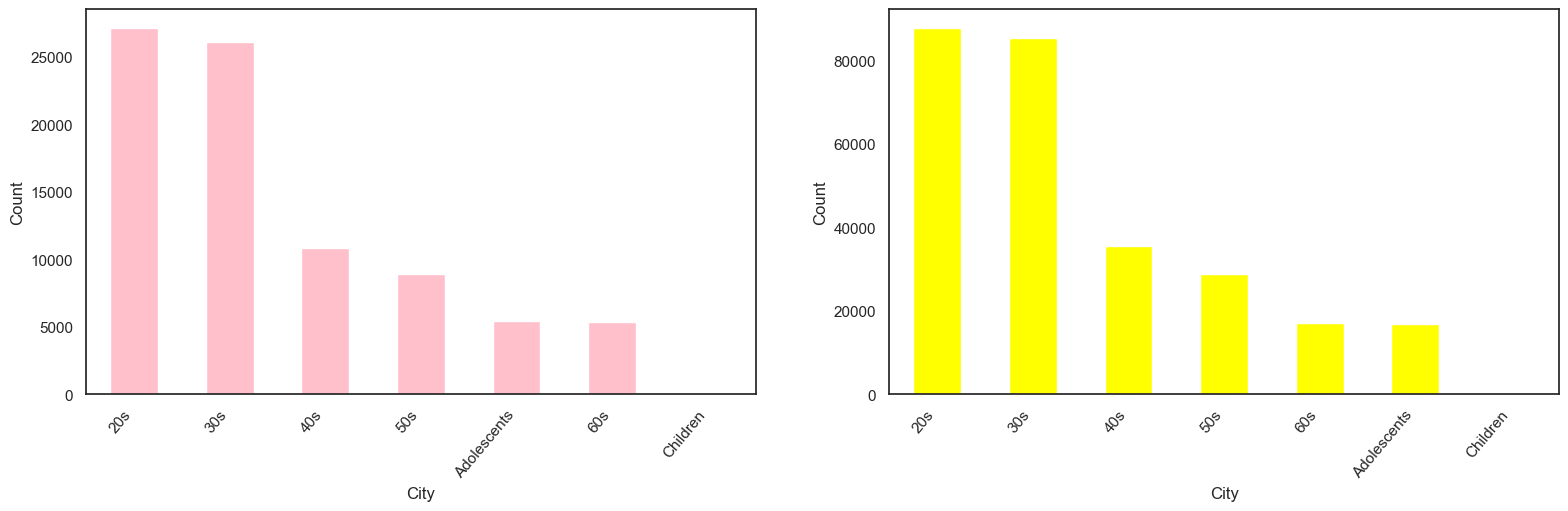

In [24]:
sns.set(rc={"figure.figsize":(19, 5)})
sns.set_theme(style ="white")

fig, axs = plt.subplots(ncols=2)

# Yellow City Plot
yellow_city = yellow_cab["Age Group"].value_counts().plot(y='number', kind='bar', color = "Yellow", legend=False, ax=axs[1])
yellow_city.set_xticklabels(yellow_city.get_xticklabels(), rotation=50, horizontalalignment='right')
yellow_city.set_xlabel("City")
yellow_city.set_ylabel("Count")

# Pink City Plot
pink_city = pink_cab["Age Group"].value_counts().plot(y='number', kind='bar', color = "Pink", legend=False, ax=axs[0])
pink_city.set_xticklabels(pink_city.get_xticklabels(), rotation=50, horizontalalignment='right')
pink_city.set_xlabel("City")
pink_city.set_ylabel("Count")